# Scikit-Learn Primer

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [4]:
len(df)

5572

In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


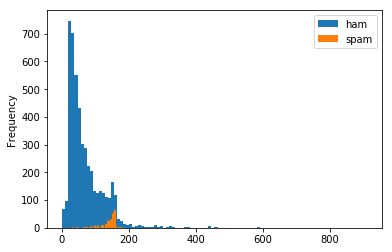

In [15]:
# Create a histogram for length for each label
import matplotlib.pyplot as plt
%matplotlib inline

df[df['label'] == 'ham']['length'].plot.hist(bins = 100)
df[df['label'] == 'spam']['length'].plot.hist(bins = 100)
plt.legend(('ham', 'spam'))

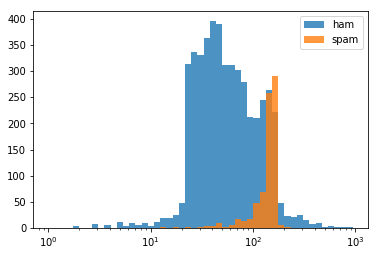

In [17]:
plt.xscale('log')
bins = 1.15 **(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'], bins = bins, alpha = 0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins = bins, alpha = 0.8)
plt.legend(('ham', 'spam'))
plt.show()

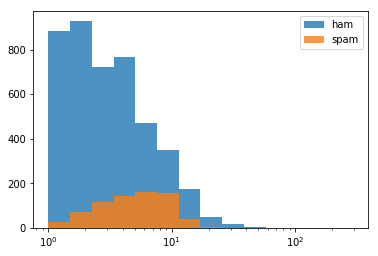

In [19]:
plt.xscale('log')
bins = 1.5 **(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'], bins = bins, alpha = 0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins = bins, alpha = 0.8)
plt.legend(('ham', 'spam'))
plt.show()

### Observation:  length of spam messages are high; for punctuation there is no relationship

In [24]:
# Selecting features

X = df.drop(['label', 'message'], axis = 1)
y = df['label']

In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train.shape

(3900, 2)

In [27]:
X_test.shape

(1672, 2)

In [28]:
y_train.shape

(3900,)

In [29]:
y_test.shape

(1672,)

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
# Test the accuracy of the Model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
predictions = lr_model.predict(X_test)

In [33]:
print(confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [36]:
df1 = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df1

,ham,spam
ham,1404,44
spam,219,5


In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [38]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb_model = MultinomialNB()

In [41]:
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
predictions = nb_model.predict(X_test)

In [43]:
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [44]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [47]:
print(metrics.accuracy_score(y_test, predictions))

0.8600478468899522


In [48]:
# Support Vector Machines
from sklearn.svm import SVC
svc_model = SVC()

In [49]:
svc_model.fit(X_test, y_test)

/Users/jayashrijagannathan/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
predictions = svc_model.predict(X_test)

In [52]:
print(metrics.confusion_matrix(y_test, predictions))

[[1424   24]
 [  85  139]]


In [51]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.94      0.98      0.96      1448
        spam       0.85      0.62      0.72       224

   micro avg       0.93      0.93      0.93      1672
   macro avg       0.90      0.80      0.84      1672
weighted avg       0.93      0.93      0.93      1672



In [53]:
print(metrics.accuracy_score(y_test, predictions))

0.9348086124401914
